In [1]:
import pandas as pd
import numpy as np

In [2]:
file_url = 'https://raw.githubusercontent.com/AGilarde12/Mall-Customer-Segmentation/master/Data/Mall_Customers.csv'

In [3]:
df = pd.read_csv(file_url)

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.to_csv('../data/raw/Mall_Customers.csv', index=False)

In [8]:
df_cleaned = df.copy()

In [9]:
df_cleaned.drop('CustomerID', axis=1, inplace=True)
df_cleaned.to_csv('../data/interim/Mall_Customers.csv', index=False)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df_cleaned, test_size=0.2, random_state=8)

In [11]:
# Task: Create a copy of X_train and save it into a variable called X_train_cleaned
X_train_cleaned = X_train.copy()

In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [13]:
# Task: Create a list called num_cols that contains Age, Annual Income (k$) and Spending Score (1-100)
num_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [14]:
sc = StandardScaler()

In [15]:
# Task: Fit and transform the numeric feature of X_train_cleaned and replace the data into it
X_train_cleaned[num_cols] = sc.fit_transform(X_train_cleaned[num_cols])

In [16]:
# Task: Create a list called cat_cols that contains Gender
cat_cols = ['Gender']

In [17]:
# Task: Instantiate a OneHotEncoder with sparse=False and drop='first' and save it to a variable called ohe
ohe = OneHotEncoder(sparse=False, drop='first')

In [18]:
# Task: Fit and transform the categorical feature of `X_train_cleaned` and replace the data into it
X_train_cleaned[cat_cols] = ohe.fit_transform(X_train_cleaned[cat_cols])

In [19]:
# Task: Reset the indexes of X_train_cleaned
X_train_cleaned.reset_index(drop=True, inplace=True)

In [20]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [21]:
# Task: Instantiate a KElbowVisualizer with an instantied KMeans and k=(2, 15) and save it into a variable 
model = KElbowVisualizer(KMeans(), k=(2,15))

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f870a28fa50>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

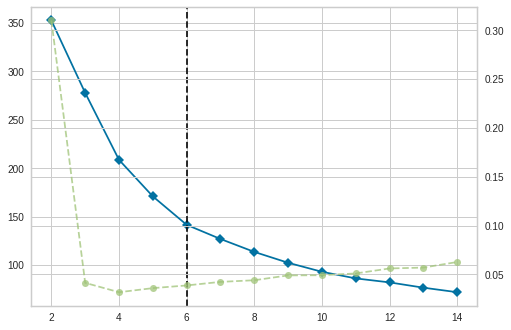

In [22]:
# Task: Fit model with X_train_cleaned
model.fit(X_train_cleaned)

In [23]:
# Task: Save the attribute elbow_value_ from model and save it to a variable called n_clusters
n_clusters = model.elbow_value_

In [24]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=n_clusters, random_state=8)

In [25]:
gmm.fit(X_train_cleaned)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=8, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [26]:
gmm.predict(X_train_cleaned)

array([2, 2, 5, 4, 1, 3, 1, 4, 0, 0, 1, 0, 0, 2, 0, 2, 0, 1, 2, 1, 1, 4,
       0, 5, 1, 0, 4, 4, 0, 5, 1, 1, 4, 3, 3, 4, 0, 2, 4, 0, 2, 2, 1, 0,
       0, 5, 3, 0, 5, 3, 2, 0, 0, 4, 4, 5, 1, 3, 1, 0, 5, 0, 0, 1, 3, 4,
       4, 1, 1, 3, 5, 2, 2, 5, 4, 5, 5, 5, 5, 0, 0, 0, 0, 4, 0, 2, 1, 5,
       5, 3, 0, 3, 0, 4, 5, 1, 0, 0, 0, 2, 5, 3, 5, 5, 4, 1, 2, 2, 1, 0,
       5, 4, 2, 3, 2, 3, 0, 0, 4, 3, 0, 0, 1, 5, 5, 0, 5, 1, 1, 0, 0, 4,
       3, 1, 0, 2, 2, 0, 0, 0, 1, 4, 1, 3, 0, 1, 4, 1, 0, 0, 0, 4, 1, 0,
       0, 5, 1, 4, 4, 1])

In [27]:
# Task: Transform the first observation of X_train_cleaned into a dataframe and call it obs
obs = pd.DataFrame(X_train_cleaned.iloc[0]).transpose()

In [28]:
gmm.predict(obs)

array([2])

In [29]:
from sklearn.pipeline import Pipeline

# Task: Create a Pipeline called num_transformer with one step that contains StandardScaler
num_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler())
    ]
)

# Task: Create a Pipeline called cat_transformer with one step that contains OneHotEncoder
cat_transformer = Pipeline(
    steps=[
        ('one_hot_encoder', OneHotEncoder(sparse=False, drop='first'))
    ]
)

In [30]:
from sklearn.compose import ColumnTransformer

# Task: Create a ColumnTransformer called preprocessor with 2 steps containing num_transformer and cat_transformer that will be applied respectively to num_cols and cat_cols
preprocessor = ColumnTransformer(
    transformers=[
        ('num_cols', num_transformer, num_cols),
        ('cat_cols', cat_transformer, cat_cols)
    ]
)

In [31]:
# Task: Create a Pipeline called gm_pipe that contains 2 steps preprocessor and another that instantiate a GaussianMixture with same parameters as previously
gmm_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('clustering', GaussianMixture(n_components=6, random_state=8))
    ]
)

In [32]:
gmm_pipe.fit(X_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num_cols',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score (1-100)']),
                         

In [33]:
gmm_pipe.predict(X_train)

array([2, 2, 5, 4, 1, 3, 1, 4, 0, 0, 1, 0, 0, 2, 0, 2, 0, 1, 2, 1, 1, 4,
       0, 5, 1, 0, 4, 4, 0, 5, 1, 1, 4, 3, 3, 4, 0, 2, 4, 0, 2, 2, 1, 0,
       0, 5, 3, 0, 5, 3, 2, 0, 0, 4, 4, 5, 1, 3, 1, 0, 5, 0, 0, 1, 3, 4,
       4, 1, 1, 3, 5, 2, 2, 5, 4, 5, 5, 5, 5, 0, 0, 0, 0, 4, 0, 2, 1, 5,
       5, 3, 0, 3, 0, 4, 5, 1, 0, 0, 0, 2, 5, 3, 5, 5, 4, 1, 2, 2, 1, 0,
       5, 4, 2, 3, 2, 3, 0, 0, 4, 3, 0, 0, 1, 5, 5, 0, 5, 1, 1, 0, 0, 4,
       3, 1, 0, 2, 2, 0, 0, 0, 1, 4, 1, 3, 0, 1, 4, 1, 0, 0, 0, 4, 1, 0,
       0, 5, 1, 4, 4, 1])

In [34]:
obs = pd.DataFrame(X_train.iloc[0]).transpose()
gmm_pipe.predict(obs)

array([2])

In [35]:
from joblib import dump 

dump(gmm_pipe,  '../models/gmm_pipeline.joblib')

['../models/gmm_pipeline.joblib']